In [1]:
from tools.functions import *
from generate_data_Finnegan import *

/opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



Please run the data generation file if not done so yet!!

Number of seed patterns:                      5
Number of prototypes per seed patterns        10
Number of prototypes total:                   50
Number of variations per prototype            10
Number of patterns total                      500
Number of input neurons (stimulus length):    200
Number of hidden neurons:                     1000
Number of class neurons:                      0
Number of class neurons per class:            0


In [2]:
output = load_output("output_2023-05-10")

In [3]:
# This calculates the hamming distances and percent match for all test patterns. 
# It uses the spike moitor ant the timepoints where the stimuli are presented

off_time = 1 # How many stimulus periods are used for recoverey period histogram

Mv_loaded = output["Mv"]
time_test_on = output["time_test_on"]
time_points_dict = output["time_points_dict"]

hamming_distances, percent_match, originals, recovered = hamming_distances_test(Mv_loaded, time_test_on, time_points_dict, off_time=off_time, 
                                                                                binarize = True, threshold = 100)

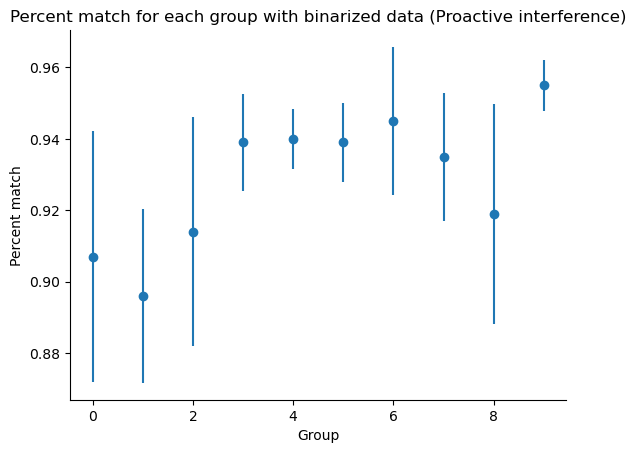

In [4]:
hd_table_between = np.array(hamming_distances[:50]).reshape(10, 5)
pm_table_between = np.array(percent_match[:50]).reshape(10, 5)
means_between = np.mean(pm_table_between, axis=1)
stds_between = np.std(pm_table_between, axis=1)

fig, ax = plt.subplots()
ax.errorbar(np.arange(10), means_between, stds_between, linestyle='None', marker='o')
ax.spines['top'].set_visible(False)
plt.xlabel("Group")
plt.ylabel("Percent match")
plt.title("Percent match for each group with binarized data (Proactive interference)")
ax.spines['right'].set_visible(False)
plt.show()



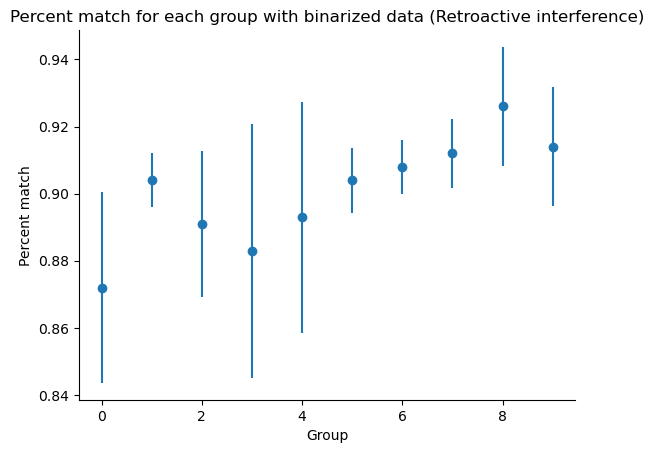

In [5]:
hd_table_within = np.array(hamming_distances[50:]).reshape(10, 5)
pm_table_within = np.array(percent_match[50:]).reshape(10, 5)
means_within = np.mean(pm_table_within, axis=1)
stds_within = np.std(pm_table_within, axis=1)

fig, ax = plt.subplots()
ax.errorbar(np.arange(10), means_within, stds_within, linestyle='None', marker='o')
ax.spines['top'].set_visible(False)
plt.xlabel("Group")
plt.ylabel("Percent match")
plt.title("Percent match for each group with binarized data (Retroactive interference)")
ax.spines['right'].set_visible(False)
plt.show()


In [6]:
time_points_dict
print(len(time_test_on))
time_test_on


100


array([ 46,  48,  50,  52,  54, 101, 103, 105, 107, 109, 156, 158, 160,
       162, 164, 211, 213, 215, 217, 219, 266, 268, 270, 272, 274, 321,
       323, 325, 327, 329, 376, 378, 380, 382, 384, 431, 433, 435, 437,
       439, 486, 488, 490, 492, 494, 541, 543, 545, 547, 549, 551, 553,
       555, 557, 559, 561, 563, 565, 567, 569, 571, 573, 575, 577, 579,
       581, 583, 585, 587, 589, 591, 593, 595, 597, 599, 601, 603, 605,
       607, 609, 611, 613, 615, 617, 619, 621, 623, 625, 627, 629, 631,
       633, 635, 637, 639, 641, 643, 645, 647, 649])

In [7]:
Mh_loaded = output["Mh"]

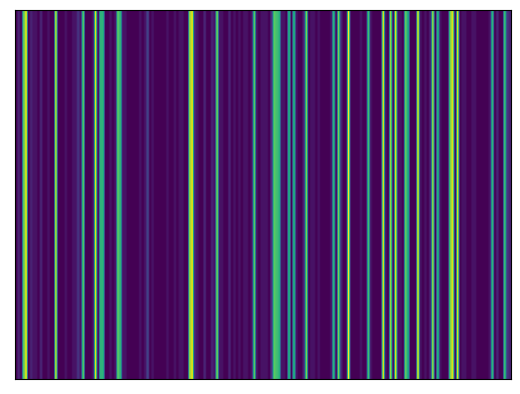

0.5563901636613878

In [8]:
t_1 = time_test_on[94]
t_2 = time_test_on[99]
timepoint_s_1 = time_points_dict["T"+str(t_1)+"_s"]
timepoint_e_1 = time_points_dict["T"+str(t_1)+"_e"]
timepoint_s_2 = time_points_dict["T"+str(t_2)+"_s"]
timepoint_e_2 = time_points_dict["T"+str(t_2)+"_e"]

fig, ax = plt.subplots()
plt.imshow(spike_histogram(Mv_loaded, timepoint_s_1, timepoint_e_1).T[1].reshape(1, 200), aspect="auto")
ax.set_yticks([])
ax.set_xticks([])
plt.show()

sh1 = spike_histogram(Mh_loaded, timepoint_s_1, timepoint_e_1).T[1]
sv1 = spike_histogram(Mv_loaded, timepoint_s_1, timepoint_e_1).T[1]
sh2 = spike_histogram(Mh_loaded, timepoint_s_2, timepoint_e_2).T[1]
sv2 = spike_histogram(Mv_loaded, timepoint_s_2, timepoint_e_2).T[1]

pattern_separation_efficacy(sv1, sv2, sh1, sh2)

In [44]:
n_seed_patterns = output["n_seed_patterns"]
n_prototype_per_seed = output["n_prototype_per_seed"]
n_variations_per_prototype = output["n_variations_per_prototype"]
after_split_n_per_prototype_test = output["after_split_n_per_prototype_test"]

In [45]:
def pattern_separation_efficacy_model(monitor_vis, monitor_hid, timpoint_dict, n_seed_patterns, n_prototype_per_seed, after_split_n_per_prototype_test, selection = "group"):
    test_patterns_while_training = after_split_n_per_prototype_test * n_prototype_per_seed * n_seed_patterns
    final_test_patterns = time_test_on[test_patterns_while_training:]
    if selection == "group":
        out = np.zeros((n_prototype_per_seed, n_seed_patterns, n_seed_patterns))
        for i in range(n_prototype_per_seed):
            test_patterns_group = final_test_patterns[i:i+n_seed_patterns]
            for j in range(n_seed_patterns):
                for k in range(n_seed_patterns):
                    t_1 = test_patterns_group[j]
                    t_2 = test_patterns_group[k]
                    timepoint_s_1 = timpoint_dict["T"+str(t_1)+"_s"]
                    timepoint_e_1 = timpoint_dict["T"+str(t_1)+"_e"]
                    timepoint_s_2 = timpoint_dict["T"+str(t_2)+"_s"]
                    timepoint_e_2 = timpoint_dict["T"+str(t_2)+"_e"]

                    sv1 = spike_histogram(monitor_vis, timepoint_s_1, timepoint_e_1).T[1]
                    sh1 = spike_histogram(monitor_hid, timepoint_s_1, timepoint_e_1).T[1]
                    sv2 = spike_histogram(monitor_vis, timepoint_s_2, timepoint_e_2).T[1]
                    sh2 = spike_histogram(monitor_hid, timepoint_s_2, timepoint_e_2).T[1]
                    if j != k:
                        out[i, j, k] = pattern_separation_efficacy(sv1, sv2, sh1, sh2)
    if selection == "prototype":
        out = np.zeros((n_seed_patterns, n_prototype_per_seed, n_prototype_per_seed))
        for i in range(n_seed_patterns):
            test_patterns_group = final_test_patterns[i::n_seed_patterns]
            for j in range(n_prototype_per_seed):
                for k in range(n_prototype_per_seed):
                    t_1 = test_patterns_group[j]
                    t_2 = test_patterns_group[k]
                    timepoint_s_1 = timpoint_dict["T"+str(t_1)+"_s"]
                    timepoint_e_1 = timpoint_dict["T"+str(t_1)+"_e"]
                    timepoint_s_2 = timpoint_dict["T"+str(t_2)+"_s"]
                    timepoint_e_2 = timpoint_dict["T"+str(t_2)+"_e"]

                    sv1 = spike_histogram(monitor_vis, timepoint_s_1, timepoint_e_1).T[1]
                    sh1 = spike_histogram(monitor_hid, timepoint_s_1, timepoint_e_1).T[1]
                    sv2 = spike_histogram(monitor_vis, timepoint_s_2, timepoint_e_2).T[1]
                    sh2 = spike_histogram(monitor_hid, timepoint_s_2, timepoint_e_2).T[1]
                    if j != k:
                        out[i, j, k] = pattern_separation_efficacy(sv1, sv2, sh1, sh2)
    return out


In [41]:
tst = pattern_separation_efficacy_model(Mv_loaded, Mh_loaded, time_points_dict, n_seed_patterns, 
                                        n_prototype_per_seed, after_split_n_per_prototype_test, 
                                        selection = "prototype")

In [43]:
mean(tst)

0.5088433959681561